
## Introduction
#### The real estate market is influenced by a variety of factors, including property characteristics, location, and market conditions. This analysis explores the relationship between house prices and various attributes such as condition, number of floors, square footage, year built, and location, using a dataset of house prices across different cities in the USA. By examining key metrics like correlation between house condition and price, price distribution by floors, and price per square foot in various cities, we aim to uncover trends that help explain what drives house values in the current market.

#### The analysis also looks at renovation trends and how they impact property values, alongside identifying the most expensive properties in recent years. Through this exploration, valuable insights emerge on how various factors influence house prices and how buyers or investors can use this information to make informed decisions in real estate transactions.








In [2]:
import pandas as pd
df=pd.read_csv(r"C:\Users\nidha\Downloads\USA Housing Dataset.csv")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4136,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4137,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4138,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


### Data Cleaning

In [3]:
for i in df:
    j=i.replace(' ','_')
    df=df.rename(columns={i:j.capitalize()})
df


,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,Condition,Sqft_above,Sqft_basement,Yr_built,Yr_renovated,Street,City,Statezip,Country
0,2014-05-09 00:00:00,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4136,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4137,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4138,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           4140 non-null   object 
 1   Price          4140 non-null   float64
 2   Bedrooms       4140 non-null   float64
 3   Bathrooms      4140 non-null   float64
 4   Sqft_living    4140 non-null   int64  
 5   Sqft_lot       4140 non-null   int64  
 6   Floors         4140 non-null   float64
 7   Waterfront     4140 non-null   int64  
 8   View           4140 non-null   int64  
 9   Condition      4140 non-null   int64  
 10  Sqft_above     4140 non-null   int64  
 11  Sqft_basement  4140 non-null   int64  
 12  Yr_built       4140 non-null   int64  
 13  Yr_renovated   4140 non-null   int64  
 14  Street         4140 non-null   object 
 15  City           4140 non-null   object 
 16  Statezip       4140 non-null   object 
 17  Country        4140 non-null   object 
dtypes: float

In [5]:
df['Date']=pd.to_datetime(df['Date'])
df['Floors']=df['Floors'].astype(int)
df['Bathrooms']=df['Bathrooms'].astype(int)
df['Bedrooms']=df['Bedrooms'].astype(int)

df.drop('Waterfront',axis=1,inplace=True)
df.drop('Street',axis=1,inplace=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           4140 non-null   datetime64[ns]
 1   Price          4140 non-null   float64       
 2   Bedrooms       4140 non-null   int64         
 3   Bathrooms      4140 non-null   int64         
 4   Sqft_living    4140 non-null   int64         
 5   Sqft_lot       4140 non-null   int64         
 6   Floors         4140 non-null   int64         
 7   View           4140 non-null   int64         
 8   Condition      4140 non-null   int64         
 9   Sqft_above     4140 non-null   int64         
 10  Sqft_basement  4140 non-null   int64         
 11  Yr_built       4140 non-null   int64         
 12  Yr_renovated   4140 non-null   int64         
 13  City           4140 non-null   object        
 14  Statezip       4140 non-null   object        
 15  Country        4140 n

In [6]:
df['Price'] = df['Price'].astype(int)
df['Price'] = df['Price'].apply(lambda x: int(x))


# 1.What is the price difference between houses that have been renovated versus those that have not?

Average price of renovated houses: $ 533139.7026221693
Average price of non-renovated houses: $ 566641.6860276199


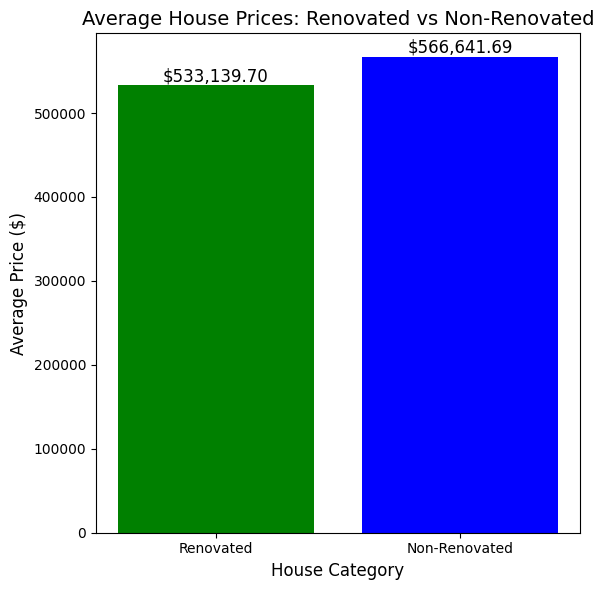

Therefore average price of renovated houses are less and have a price differrence of $ 33501.98340545059 


In [7]:
# 1.What is the price difference between houses that have been renovated versus those that have not?


renovated = df[df['Yr_renovated'] != 0]
not_renovated = df[df['Yr_renovated'] == 0]

# Calculate average prices for both categories
avg_price_renovated = renovated['Price'].mean()
avg_price_not_renovated = not_renovated['Price'].mean()

# Print the price difference
price_difference = avg_price_not_renovated-avg_price_renovated 
print("Average price of renovated houses: $",avg_price_renovated)
print("Average price of non-renovated houses: $",avg_price_not_renovated)



import matplotlib.pyplot as plt

categories = ['Renovated', 'Non-Renovated']
avg_prices = [avg_price_renovated, avg_price_not_renovated]


plt.figure(figsize=(6, 6))
plt.bar(categories, avg_prices, color=['green', 'blue'])


plt.title('Average House Prices: Renovated vs Non-Renovated', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xlabel('House Category', fontsize=12)


for i, price in enumerate(avg_prices):
    plt.text(i, price + 5000, f'${price:,.2f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


print('Therefore average price of renovated houses are less and have a price differrence of $',price_difference,'')



 The analysis reveals that renovated houses have a lower average price compared to non-renovated houses, which may seem counterintuitive at first.
 The difference between the average price of non-renovated and renovated houses is:33501.98340545059
 



# 2.How does the condition of the house affect the price?



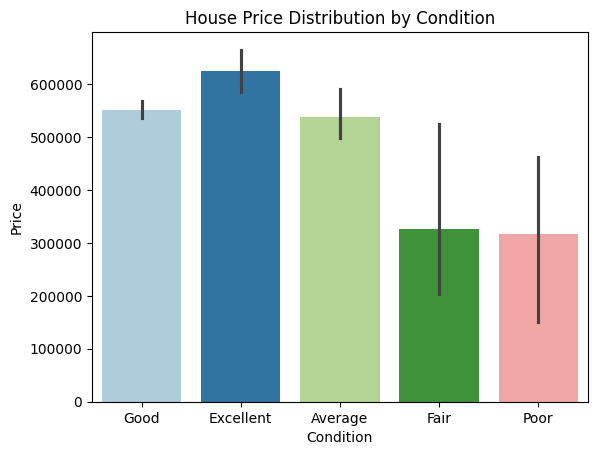

Correlation between condition and price:  0.030327215351981303


In [8]:
correlation_cndtn = df['Condition'].corr(df['Price'])


import seaborn as sns
import matplotlib.pyplot as plt

condition_mapping = {
    1: 'Poor',
    2: 'Fair',
    3: 'Good',
    4: 'Average',
    5: 'Excellent'
}

# Replace numerical values with names in the 'Condition' column
df['Condition'] = df['Condition'].replace(condition_mapping)

# Box plot to visualize price distribution by condition
sns.barplot(x='Condition', y='Price', data=df,hue="Condition",palette='Paired')
plt.title('House Price Distribution by Condition')
plt.xlabel('Condition')
plt.ylabel('Price') 
plt.show()
print('Correlation between condition and price: ',correlation_cndtn)

### The boxplot or barplot helps visualize how prices are distributed across different conditions.
Here it shows a steady increase in price with respect to the condition except of the conditions good and average which is counterintuitive .





#  3.Do houses with multiple floors (floors) command higher prices?

Floors
1    478777.002994
2    654783.905973
3    568108.414414


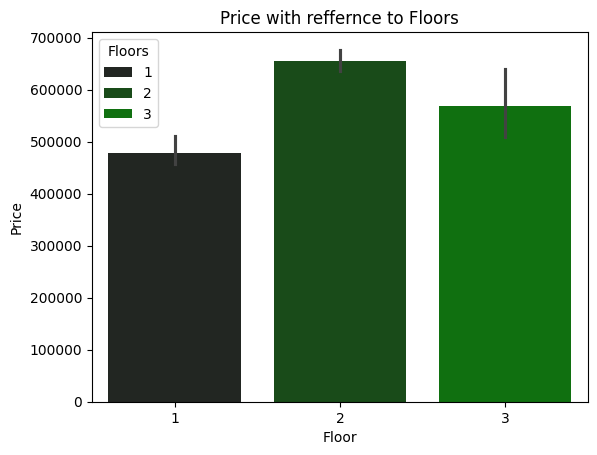

In [9]:


floor_price=df.groupby('Floors')['Price'].mean()
print(floor_price.to_string())

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Floors',y='Price',hue='Floors',data=df,palette='dark:green')
plt.title('Price with reffernce to Floors')
plt.xlabel('Floor')
plt.ylabel('Price')
plt.show()



### From here it is clear that there is no uptrend for the no of floors with price, as most of the people prefer 2 storeis in terms of financially.


# 4.Details of Largest house in each city 

                    City    Price  Sqft_living  Floors  Bedrooms  Bathrooms Country
1138              Algona   196440         1560       1         3          2     USA
3434              Auburn   835000         4930       2         4          4     USA
1016  Beaux Arts Village   745000         1490       1         3          1     USA
1826            Bellevue  7062500        10040       2         5          4     USA
3243       Black Diamond   650000         3350       2         4          2     USA
3380             Bothell   720000         3550       1         4          3     USA
2823              Burien   995000         4380       2         3          4     USA
842            Carnation  1680000         5584       2         4          4     USA
3269          Clyde Hill  3800000         7050       1         5          5     USA
4054           Covington   297857         3490       2         4          2     USA
3303          Des Moines   392000         3740       1         5          2 

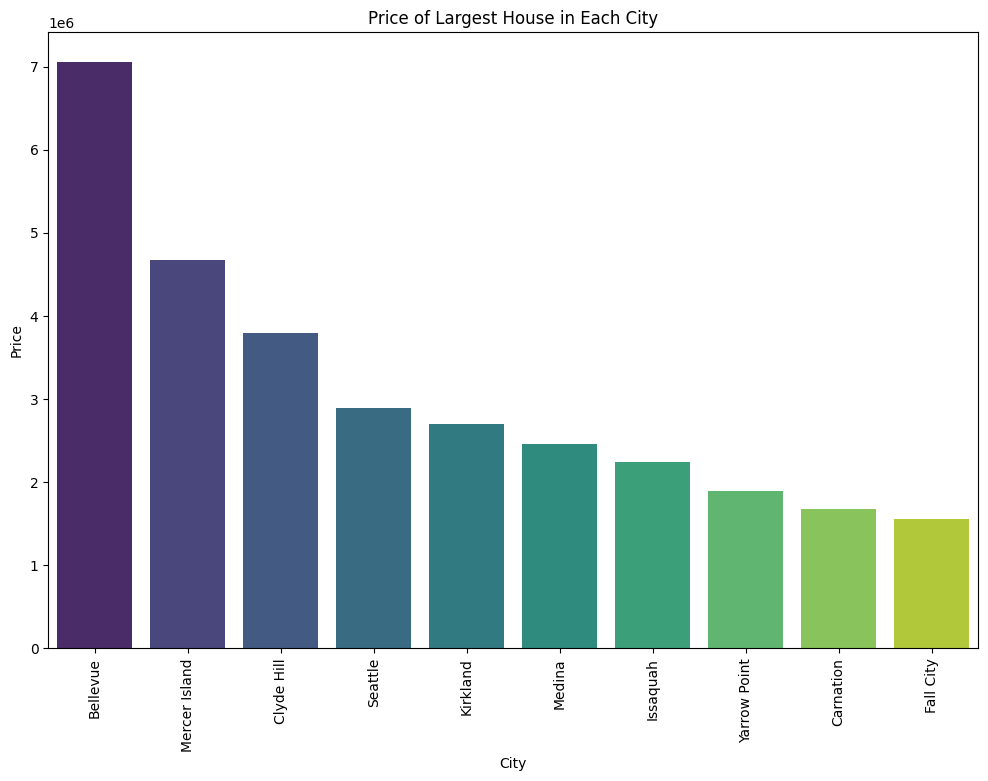

In [22]:

largest_house_in_each_city = df.loc[df.groupby('City')['Sqft_living'].idxmax(),['City','Price','Sqft_living','Floors','Bedrooms','Bathrooms','Country']]

print(largest_house_in_each_city.to_string())
largest_house_in_each_city = largest_house_in_each_city.sort_values(by='Price',ascending=False).head(10)

# Bar plot for the price of largest house in each city
plt.figure(figsize=(12, 8))
sns.barplot(x='City', y='Price', data=largest_house_in_each_city, hue="City",palette='viridis')
plt.xticks(rotation=90)
plt.title('Price of Largest House in Each City')
plt.xlabel('City')
plt.ylabel('Price')
plt.show()

# 5.Average price over city for each month show casing the price difference of houses 


26590000
     Month                City          Price
0        5              Algona  196440.000000
1        5              Auburn  298881.152174
2        5  Beaux Arts Village  745000.000000
3        5            Bellevue  761096.625000
4        5       Black Diamond  398000.000000
..     ...                 ...            ...
112      7           Skykomish  150000.000000
113      7          Snoqualmie  579166.666667
114      7             Tukwila  301750.000000
115      7              Vashon  470000.000000
116      7         Woodinville  539428.571429

[117 rows x 3 columns]


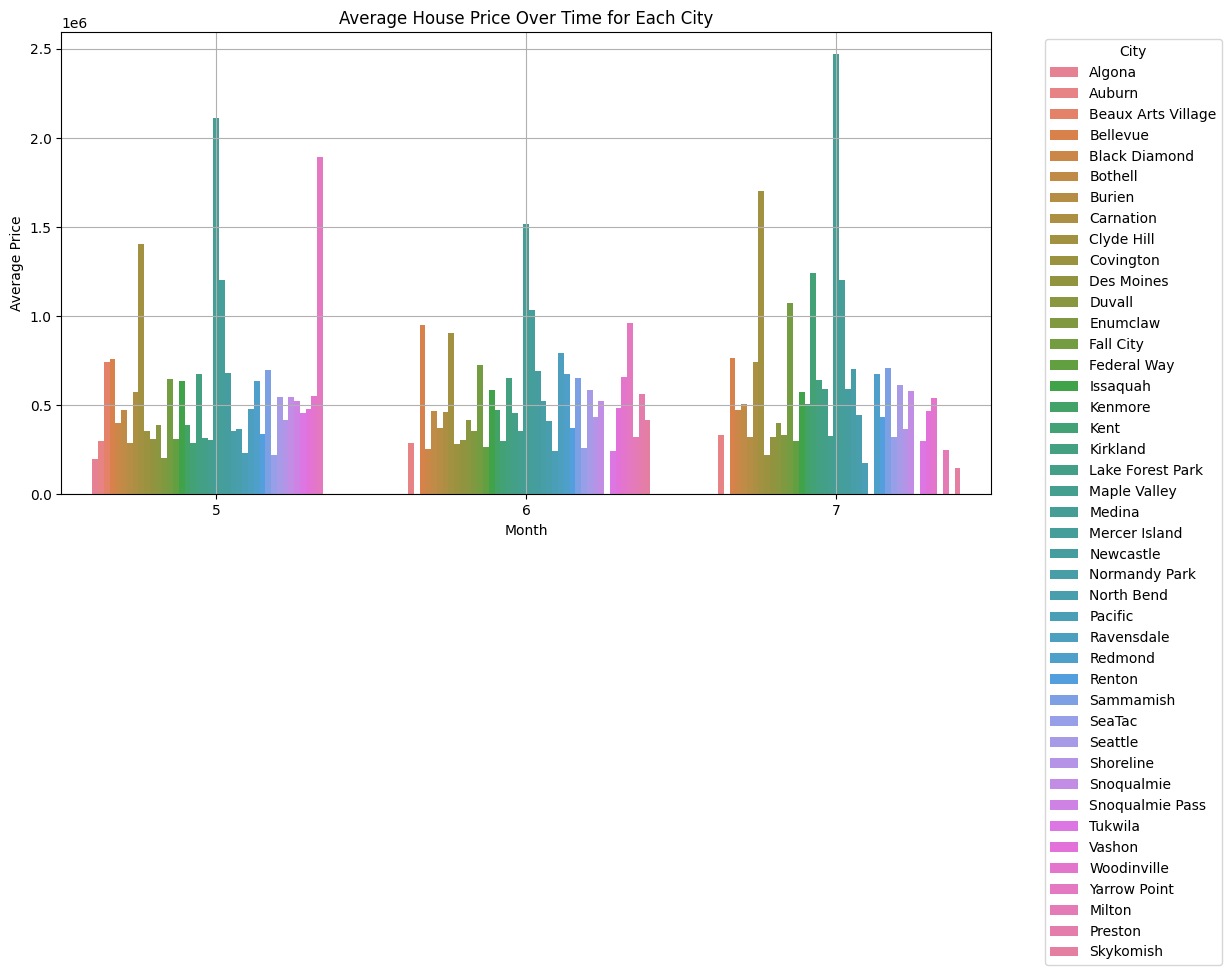

In [11]:



df['Price'] = df['Price'].astype(int)
df['Month']=df['Date'].dt.month      
               
avg_price_month=df.groupby(['Month','City'])['Price'].mean().reset_index()
max_price=df['Price'].max()
print(max_price)


print(avg_price_month)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Price', hue='City', data=avg_price_month)

plt.title('Average House Price Over Time for Each City')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.legend(title='City', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()


# 6.does size of the house have a linear trend with respect to the price

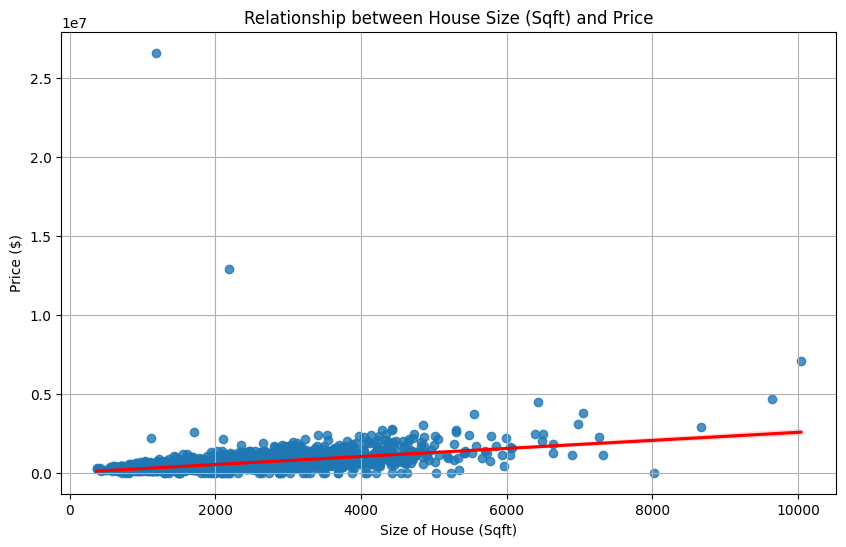

 correlation  0.41852804478608924


In [12]:


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x='Sqft_living', y='Price', data=df, line_kws={'color':'red'})

plt.title('Relationship between House Size (Sqft) and Price')
plt.xlabel('Size of House (Sqft)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

correlation_sqft_price=df['Sqft_living'].corr(df['Price'])
print(' correlation ',correlation_sqft_price)




### Therefore it shows a positive correlation in Size of the house with Price , Which is: 0.41852804478608924

# 7.What is the average time between a house being built and renovated?

In [13]:


renovated_houses = df[df['Yr_renovated'] > 0]
renovated_houses['Years_to_reovate']=renovated['Yr_renovated']-renovated['Yr_built']
avg_time_to_renovate=renovated_houses['Years_to_reovate'].mean()
print("The average time between a house being built and renovated is",avg_time_to_renovate)

The average time between a house being built and renovated is 35.19308700834326


C:\Users\nidha\AppData\Local\Temp\ipykernel_23512\2980590659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renovated_houses['Years_to_reovate']=renovated['Yr_renovated']-renovated['Yr_built']


### The average time between a house being built and renovated is 35.19308700834326

# 8.Does increase in View affect the price

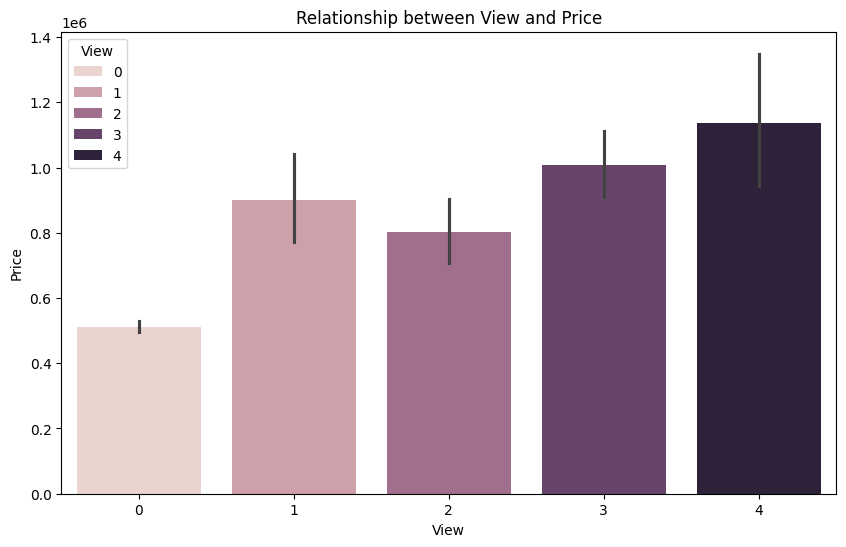

In [14]:


import matplotlib.pyplot as pltx
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='View',y='Price',data=df,hue='View')

plt.xlabel('View')
plt.ylabel('Price')
plt.title('Relationship between View and Price')
plt.show()


### There is a non-linear trend with respect to view and price

# 9.House with greatest price in each year

In [15]:


import pandas as pd


df['Latest_year'] = df[['Yr_built', 'Yr_renovated']].max(axis=1)


max_price_indices = df.loc[df.groupby('Latest_year')['Price'].idxmax()]
sorted_max_price_houses = max_price_indices.sort_values(by=['Latest_year', 'Price'], ascending=[False, True])

print("House with the greatest price in each year:")
print(sorted_max_price_houses[['Latest_year', 'Price', 'Yr_built', 'Yr_renovated','City',]].to_string())



House with the greatest price in each year:
      Latest_year     Price  Yr_built  Yr_renovated           City
3499         2014   2351956      2014             0  Mercer Island
3239         2013   2065000      2013          1923       Bellevue
77           2012   1264000      2012          1912       Bellevue
763          2011    980000      1967          2011        Seattle
2            2010   2238888      2010             0       Issaquah
2194         2009   4668000      1983          2009  Mercer Island
749          2008   2150000      2008             0       Bellevue
1111         2007   2750000      1952          2007         Medina
3813         2006   2321000      2006             0  Mercer Island
672          2005   2700000      2005             0       Kirkland
2824         2004   2300000      2004          2003       Bellevue
1868         2003   2888000      1965          2003        Seattle
2386         2002   2200000      2002             0       Issaquah
3886         2001 

### 10.Price per square feet across different cities(cities with highest and lowest price per sqft)

                  City  Price_per_sqft
2   Beaux Arts Village      500.000000
21              Medina      492.127576
42        Yarrow Point      490.384531
22       Mercer Island      346.073910
8           Clyde Hill      338.642715
           City  Price_per_sqft
33       SeaTac      158.669504
27      Pacific      157.684789
1        Auburn      151.821628
14  Federal Way      143.902656
0        Algona      125.923077


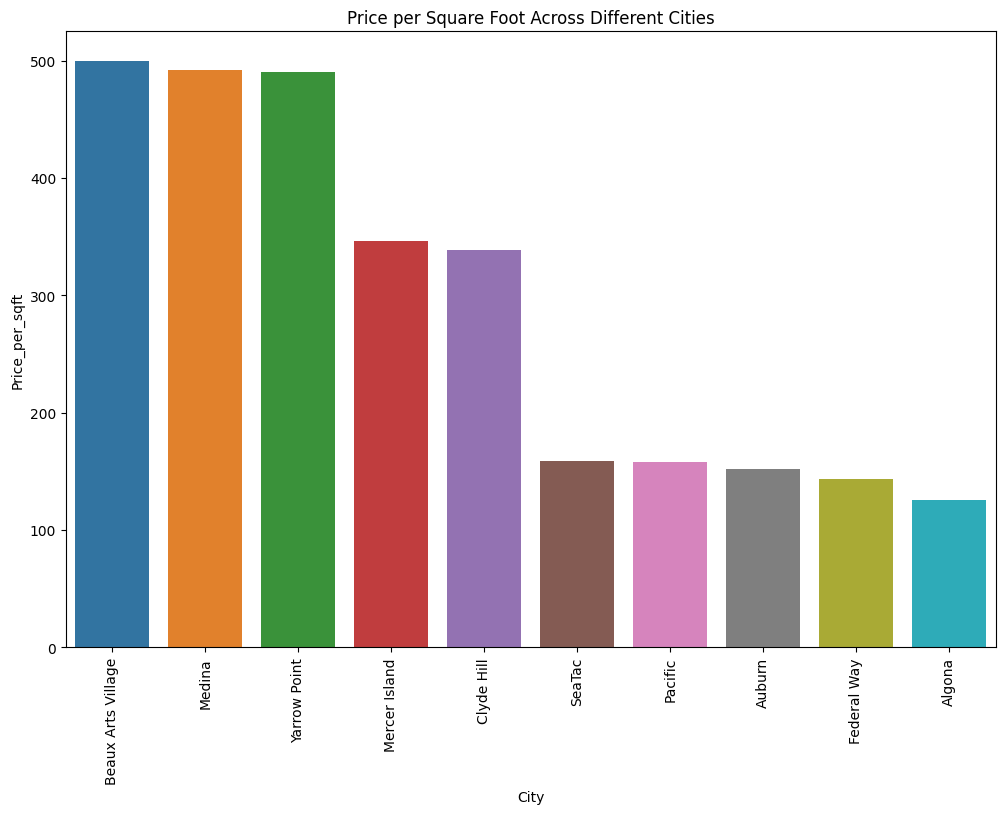

In [20]:

df['Price_per_sqft'] = df['Price'] / df['Sqft_living']

city_price_per_sqft = df.groupby('City')['Price_per_sqft'].mean().reset_index()
city_price_per_sqft = city_price_per_sqft.sort_values(by='Price_per_sqft', ascending=False)

top_city=city_price_per_sqft.head(5)
print(top_city)
bottom_city=city_price_per_sqft.tail(5)
print(bottom_city)
top_and_bottom_cities = pd.concat([top_city, bottom_city])


import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(12, 8))
sns.barplot(x='City', y='Price_per_sqft', data=top_and_bottom_cities,hue='City')
plt.title('Price per Square Foot Across Different Cities')
plt.xticks(rotation=90)
plt.show()




### From the above graph it is clear that the City with highest price per square feet is Beaux arts village and city with lowest price per square feet is Algona
 

# <font color='green'>Conclusion</font>



House prices are primarily driven by location, size, and specific neighborhood characteristics. There is a weak correlation between house condition and price ($654,784), followed by three-floor and one-floor homes. Cities also show notable price disparities; affluent areas like Bellevue and Mercer Island consistently have the highest prices, while more affordable homes are found in cities like Algona and Auburn. These patterns highlight location as a critical determinant of property value.

Price per square foot also varies by neighborhood, illustrating how area desirability affects valuation. For instance, Beaux Arts Village has a high cost per square foot of $500 compared to Algona’s $125.92. Renovations can increase a property's market value, especially in desirable locations, as seen with a high-priced renovated home in Bellevue. Additionally, properties with scenic views or waterfront locations generally command higher prices, aligning with common real estate trends where such features boost a property's appeal and value.

In summary, house prices reflect an interplay of location, physical attributes (such as floors and square footage), and neighborhood appeal, with desirable areas, multi-floor homes, scenic views, and timely renovations having the most positive impact on property value.



# <font color='green'>Final Insight</font>

#### The analysis highlights that while house condition alone does not greatly affect prices, factors such as location, the number of floors, square footage, and the presence of modern renovations are much stronger indicators of property value. High-end cities like Bellevue, Mercer Island, and Kirkland tend to dominate the upper end of the housing market, while more affordable options exist in cities like Algona and Auburn. For buyers or investors, focusing on multi-floor homes, well-located properties, and houses that have been recently renovated may yield better returns.